In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from sqlalchemy import create_engine
import os
import pymysql

### In this Notebook, we are going to use the visualziation tools to show your some insight information about the Philddelphia House Data. Part I data are based on the orginal datasets. Part II data are based on the summary table.

###  Part I

In [2]:
phi_house_data_vis = pd.read_csv('../data/phi_opa_properties_public.csv')
# original file can be download from 
# https://www.opendataphilly.org/dataset/opa-property-assessments/resource/3084509c-82ad-4718-8ab2-474196eff98b

/Users/nli/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning:

Columns (2,5,12,20,31,43,54,61,68,69,72,74) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
# This data visualzation is based the original uncleaned data from Philly government
# You will have some senses what kinds of housing related descirption words has the most frequency in the Phiadelphia
phi_house_data_vis.head()

the_geom        lng  \
0  0101000020E6100000D4E21F8673C952C0CBA8E9A316F7... -75.147676   
1  0101000020E6100000A9112A846AC952C03BE14A5A0CF7... -75.147126   
2  0101000020E6100000D01019376BC952C07F5658870CF7... -75.147169   
3  0101000020E6100000BA5DAA196CC952C07BF4F20D0DF7... -75.147223   
4  0101000020E6100000BEB025446DC952C014FECA560DF7... -75.147294   

  assessment_date basements            beginning_point book_and_page  \
0             NaN         D  16'7" W HANCOCK                   65522   
1             NaN         D  S W COR HOWARD ST                466484   
2             NaN         D  12'6" W HOWARD ST                709919   
3             NaN         A  24.250' NW OF HOWARD ST     3.18641e+06   
4             NaN       NaN  44.194' SW OF HOWARD ST     3.19248e+06   

  building_code  building_code_description  category_code  \
0         O30            ROW 2 STY MASONRY              1   
1         O50            ROW 3 STY MASONRY              1   
2         O50            ROW 3 STY MASONRY              1   
3         P70      ROW W/GAR 4 STY MASONRY              1   
4         SR     VACANT LAND RESIDE < ACRE              6   

  category_code_description  ...  unit utility view_type year_built  \
0             Single Family  ...   NaN     NaN         I       1920   
1             Single Family  ...   NaN     NaN         I       1920   
2             Single Family  ...   NaN     NaN         I       1920   
3             Single Family  ...   NaN       A         I       2019   
4               Vacant Land  ...   NaN     NaN       NaN          0   

   year_built_estimate   zip_code  zoning   objectid        lat  \
0                  NaN  191476127   RSA5   675202590  39.930378   
1                    Y  191476126   RSA5   675202591  39.930064   
2                    Y  191476126   RSA5   675202592  39.930070   
3                  NaN  191476112   RM1    675202593  39.930086   
4                  NaN  191476112   ICMX   675202594  39.930095   

   number_of_bedrooms  
0                 3.0  
1                 2.0  
2                 2.0  
3                 4.0  
4                 0.0  

[5 rows x 79 columns]

In [4]:
phi_house_data_vis.columns

Index(['the_geom', 'lng', 'assessment_date', 'basements', 'beginning_point',
       'book_and_page', 'building_code', 'building_code_description',
       'category_code', 'category_code_description', 'census_tract',
       'central_air', 'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'the_geom_webmercator',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_date', 'registry_number

### Word Cloud: See which keywords have the high frequency in the dataset

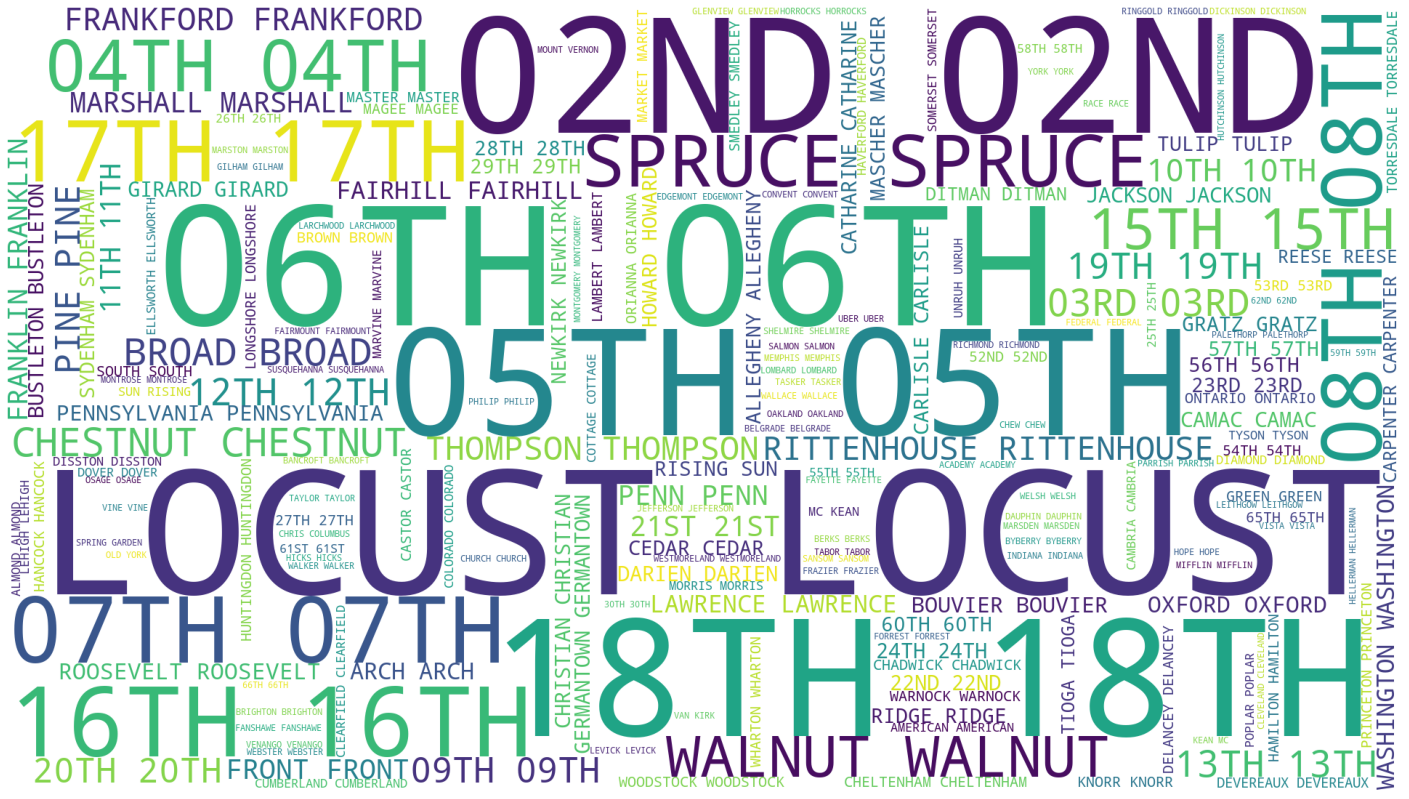

In [5]:
# Street Name:
plt.subplots(figsize = (25, 15))
wordcloud=WordCloud(background_color = 'white', 
                    width = 1920, 
                    height = 1080
                    ).generate(" ".join(phi_house_data_vis.street_name))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
cloud = wordcloud.to_file('../jupyter_nb/Vis_Figures/WC_street_name.jpg')

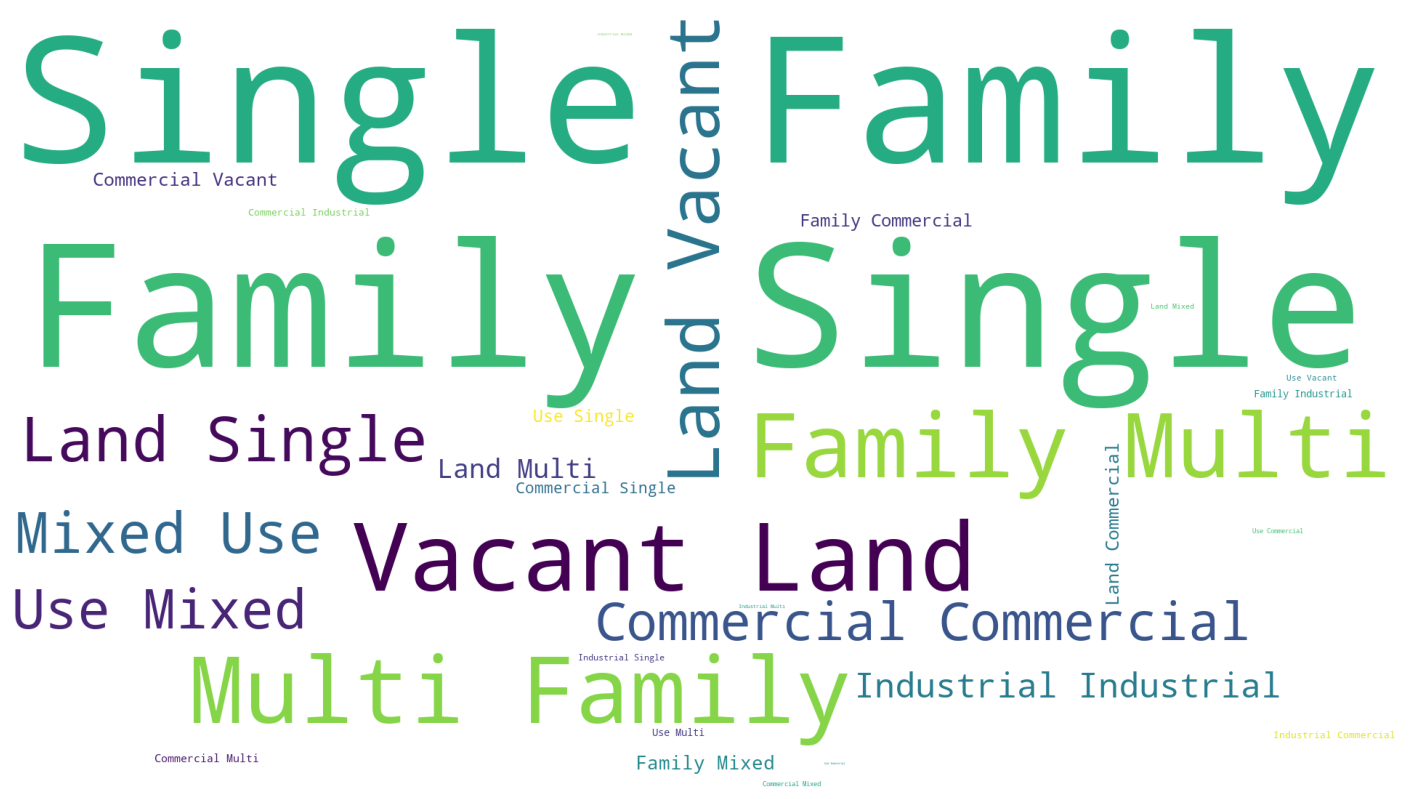

In [6]:
#category_code_description
plt.subplots(figsize = (25, 15))
wordcloud=WordCloud(background_color = 'white', 
                    width = 1920, 
                    height = 1080
                    ).generate(" ".join(phi_house_data_vis.category_code_description))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
cloud = wordcloud.to_file('../jupyter_nb/Vis_Figures/WC_category_code_description.jpg')

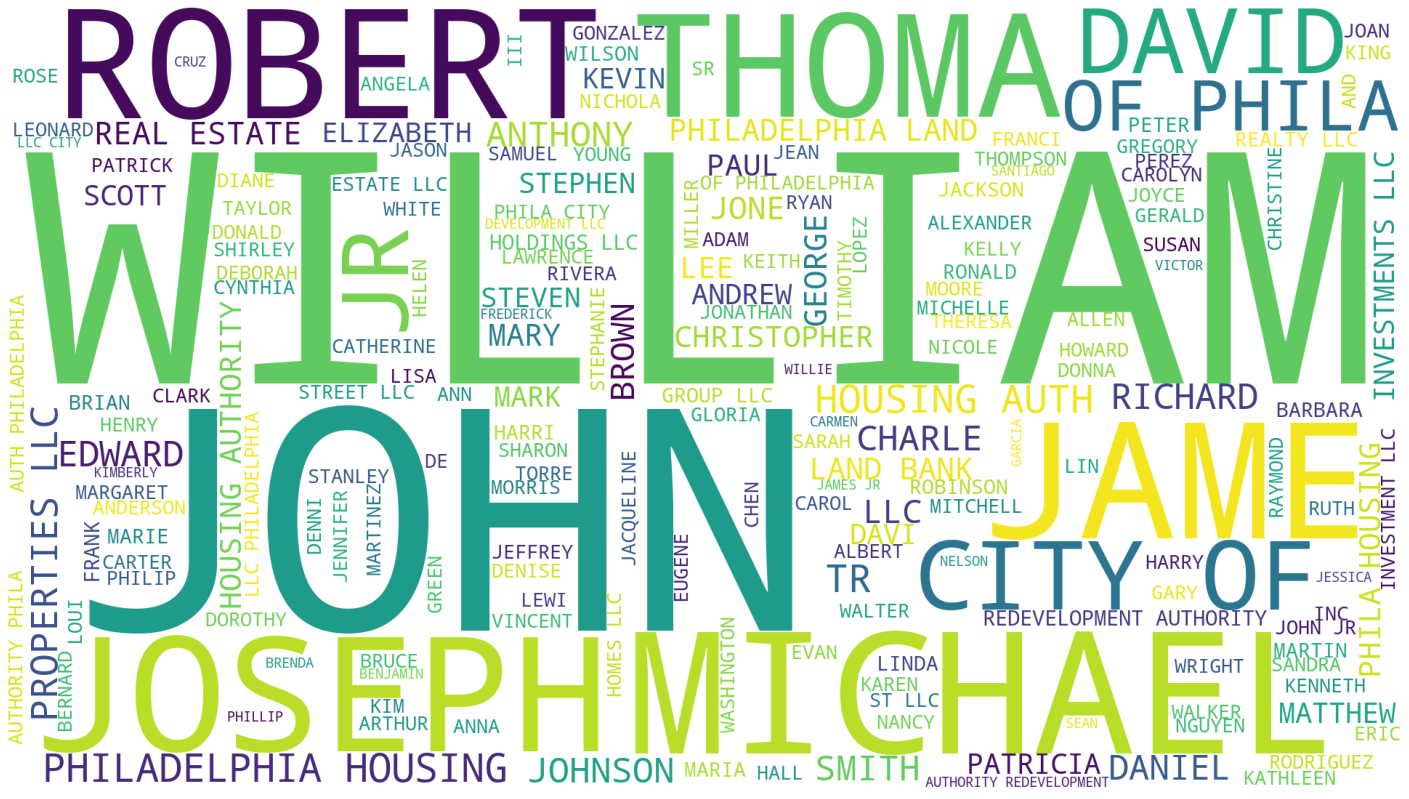

In [7]:
# owner name
plt.subplots(figsize = (25, 15))
wordcloud=WordCloud(background_color = 'white', 
                    width = 1920, 
                    height = 1080
                    ).generate(" ".join(phi_house_data_vis.owner_1))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
cloud = wordcloud.to_file('../jupyter_nb/Vis_Figures/WC_owner_name.jpg')

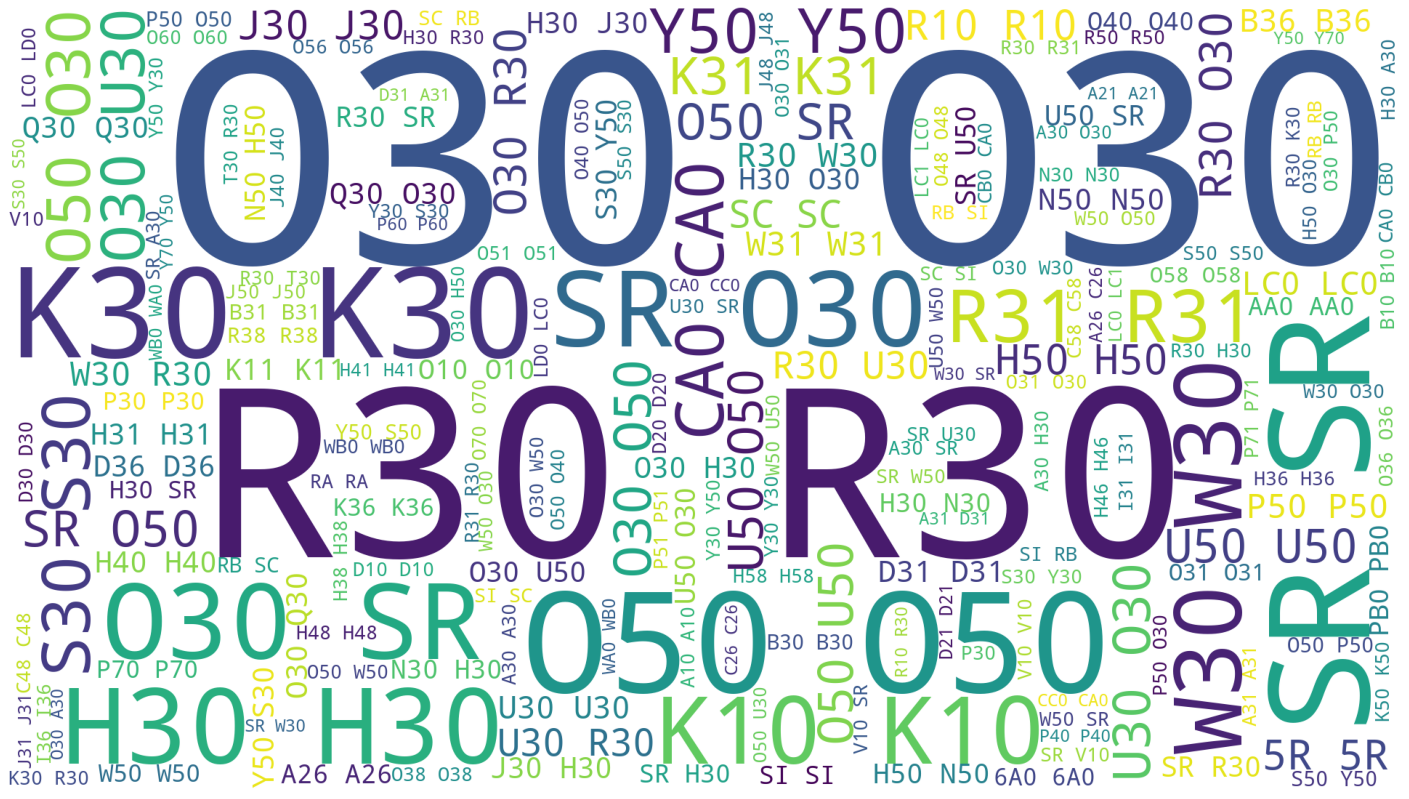

In [8]:
# building_code
plt.subplots(figsize = (25, 15))
wordcloud=WordCloud(background_color = 'white', 
                    width = 1920, 
                    height = 1080
                    ).generate(" ".join(phi_house_data_vis.building_code))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
cloud = wordcloud.to_file('../jupyter_nb/Vis_Figures/WC_building_code.jpg')

### Heatmap: House Location and Price Ditribution

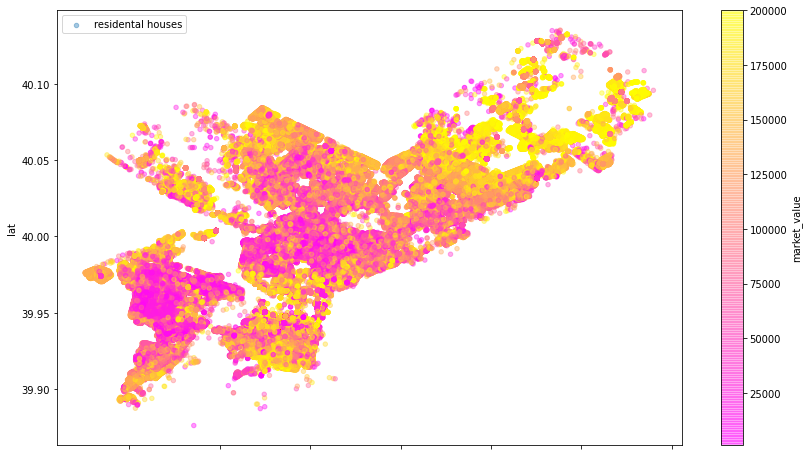

In [9]:
#House Price less than $ 200,000 (> 1000)
geo_phi_pp_vis = phi_house_data_vis[(
    phi_house_data_vis.market_value >= 1000) & (phi_house_data_vis.market_value <= 200000)].plot(
    kind='scatter', x='lng', y='lat', label='residental houses',c='market_value', cmap=plt.get_cmap('spring'), 
                colorbar=True, alpha=0.4, figsize=(14,8))
geo_phi_pp_vis.legend()
geo_phi_pp_vis.figure.savefig('../jupyter_nb/Vis_Figures/phi_house_market_value_less_200k.jpg')

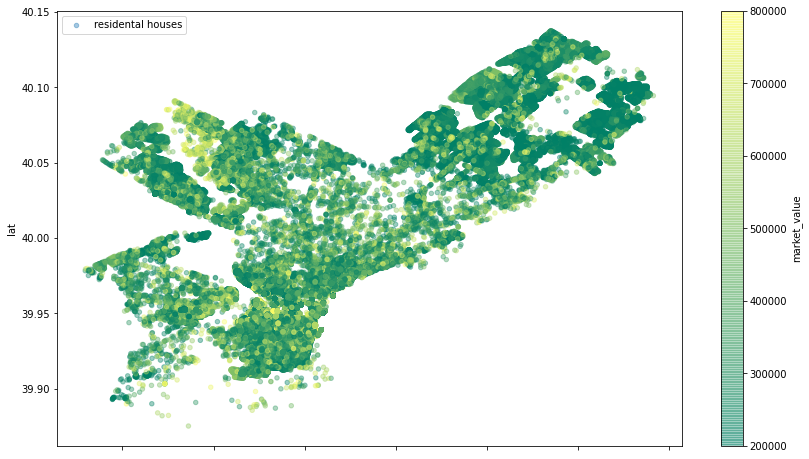

In [10]:

geo_phi_pp_vis = phi_house_data_vis[(
    phi_house_data_vis.market_value >= 200000) & (phi_house_data_vis.market_value <= 800000)].plot(
                kind='scatter', x='lng', y='lat', 
                label='residental houses',c='market_value', cmap=plt.get_cmap('summer'), 
                colorbar=True, alpha=0.4, figsize=(14,8))
geo_phi_pp_vis.legend()
geo_phi_pp_vis.figure.savefig('../jupyter_nb/Vis_Figures/phi_house_market_value_200k_800k.jpg')

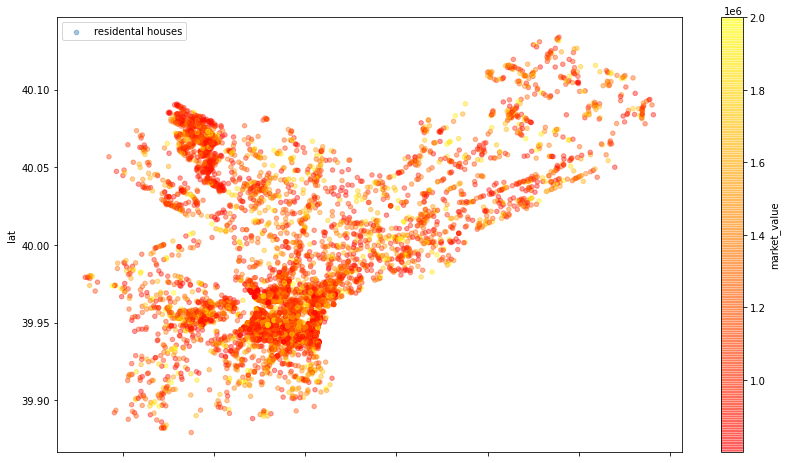

In [11]:
geo_phi_pp_vis = phi_house_data_vis[(
    phi_house_data_vis.market_value > 800000) & (phi_house_data_vis.market_value <= 2000000)].plot(
                kind='scatter', x='lng', y='lat', 
                label='residental houses',c='market_value', cmap=plt.get_cmap('autumn'), 
                colorbar=True, alpha=0.4, figsize=(14,8))
geo_phi_pp_vis.legend()
geo_phi_pp_vis.figure.savefig('../jupyter_nb/Vis_Figures/phi_house_market_value_800k_2M.jpg')

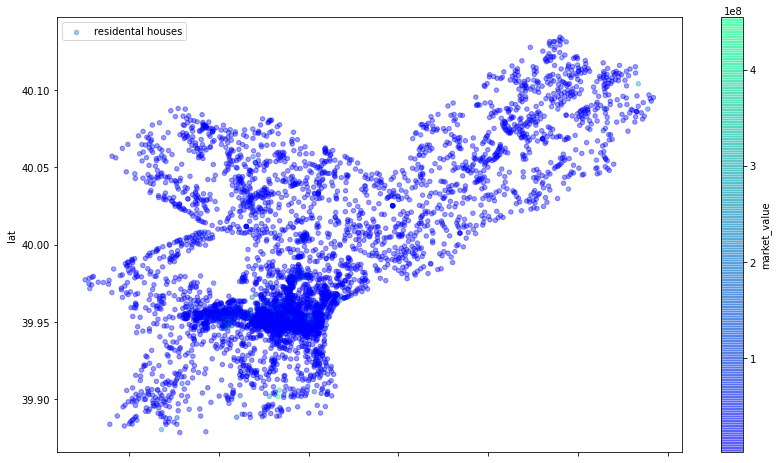

In [12]:
geo_phi_pp_vis = phi_house_data_vis[phi_house_data_vis.market_value >= 2000000].plot(kind='scatter', x='lng', y='lat', 
                label='residental houses',c='market_value', cmap=plt.get_cmap('winter'), 
                colorbar=True, alpha=0.4, figsize=(14,8))
geo_phi_pp_vis.legend()
geo_phi_pp_vis.figure.savefig('../jupyter_nb/Vis_Figures/phi_house_market_value_great_2M.jpg')

### Part II
### The follwing data visualization data are come from Spark SQL at Databricks, based on 8 datasets with joint tables

In [29]:
zip_code_gb_phi_df = pd.read_csv('../data/summary_data/zip_code_gb_phi_house_df_summary.csv')

In [30]:
zip_code_gb_phi_df.head()

zip_code  number_zip_code_count  avg_market_value  avg_number_bedrooms  \
0     19132                   6895             50549                  2.8   
1     19151                   8108            145389                  1.8   
2     19121                   6186            220812                  3.0   
3     19138                   7144            110850                  2.9   
4     19147                  11106            447367                  1.8   

   avg_number_stories  avg_taxable_building  avg_taxable_land  avg_total_area  \
0                 2.0                 30908              8447            1033   
1                 1.9                 96239             24107            2261   
2                 2.1                 81288             45149            1301   
3                 1.9                 72611             16469            1837   
4                 2.1                249633            111524             846   

   avg_livable_area  avg_year_built  avg_sale_price  hospitals_count  \
0              1386            1924           57026              NaN   
1              1581            1932          117789              NaN   
2              1932            1934          214792              NaN   
3              1329            1925           77899              NaN   
4              1944            1933          357846              NaN   

   parks_recreation_count  police_dept_stations_count  \
0                    15.0                         NaN   
1                     7.0                         1.0   
2                    19.0                         1.0   
3                     5.0                         NaN   
4                    32.0                         1.0   

   healthy_corner_stores_count  health_centers_count  schools_count  \
0                         47.0                   2.0           14.0   
1                         13.0                   NaN           14.0   
2                         34.0                   4.0           22.0   
3                         14.0                   NaN           13.0   
4                         16.0                   2.0           12.0   

   fire_dept_stations_count  ave_sale_count_2017_to_2020_market_sale  \
0                       2.0                                     39.0   
1                       1.0                                     27.0   
2                       3.0                                     29.0   
3                       NaN                                     31.0   
4                       4.0                                     54.0   

   avg_sales_price_2017_to_2020_market_sale  
0                                   36829.0  
1                                  144686.0  
2                                  163343.0  
3                                  122286.0  
4                                  463378.0

In [31]:
zip_code_gb_phi_df.shape

(47, 20)

In [32]:
zip_code_gb_phi_df.isnull().sum()

zip_code                                     0
number_zip_code_count                        0
avg_market_value                             0
avg_number_bedrooms                          0
avg_number_stories                           0
avg_taxable_building                         0
avg_taxable_land                             0
avg_total_area                               0
avg_livable_area                             0
avg_year_built                               0
avg_sale_price                               0
hospitals_count                             25
parks_recreation_count                       1
police_dept_stations_count                  27
healthy_corner_stores_count                 13
health_centers_count                        25
schools_count                                1
fire_dept_stations_count                     7
ave_sale_count_2017_to_2020_market_sale      1
avg_sales_price_2017_to_2020_market_sale     1
dtype: int64

In [34]:
zip_code_gb_phi_df = zip_code_gb_phi_df.fillna(0)

In [35]:
zip_code_gb_phi_df.isnull().sum()

zip_code                                    0
number_zip_code_count                       0
avg_market_value                            0
avg_number_bedrooms                         0
avg_number_stories                          0
avg_taxable_building                        0
avg_taxable_land                            0
avg_total_area                              0
avg_livable_area                            0
avg_year_built                              0
avg_sale_price                              0
hospitals_count                             0
parks_recreation_count                      0
police_dept_stations_count                  0
healthy_corner_stores_count                 0
health_centers_count                        0
schools_count                               0
fire_dept_stations_count                    0
ave_sale_count_2017_to_2020_market_sale     0
avg_sales_price_2017_to_2020_market_sale    0
dtype: int64

In [39]:
# Average Market Price Group By Zip Zode 
fig = px.bar(zip_code_gb_phi_df, x = 'zip_code', y= 'avg_market_value', color = 'number_zip_code_count', 
             template = 'plotly_dark', title = 'Average Market Value GroupBy Zipcode')
fig.update_layout(xaxis_tickformat = ' ')
fig.update_layout(yaxis_title="avg_market_value (USD)")
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(nticks=53)
fig.show()

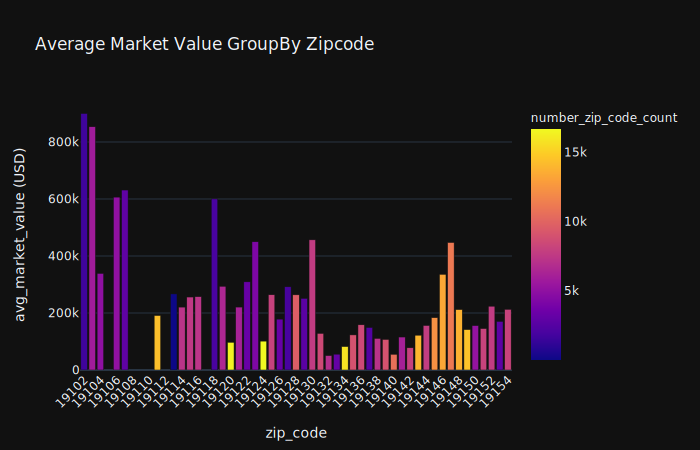

In [40]:
fig.write_image('../jupyter_nb/Vis_Figures/Avg_Mmarket_By_Zip_Code.jpg')
fig.show('svg')
# Save a static svg here for github visulazation purpose

In [43]:
# Average Taxable Building Group By Zip Zode 
fig = px.bar(zip_code_gb_phi_df, x = 'zip_code', y= 'avg_taxable_building', color = 'number_zip_code_count', 
             template = 'plotly_dark', title = 'Average Taxable Building GroupBy Zipcode')
fig.update_layout(xaxis_tickformat = ' ')
fig.update_layout(yaxis_title="avg_taxable_building (USD)")
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(nticks=53)
fig.show()

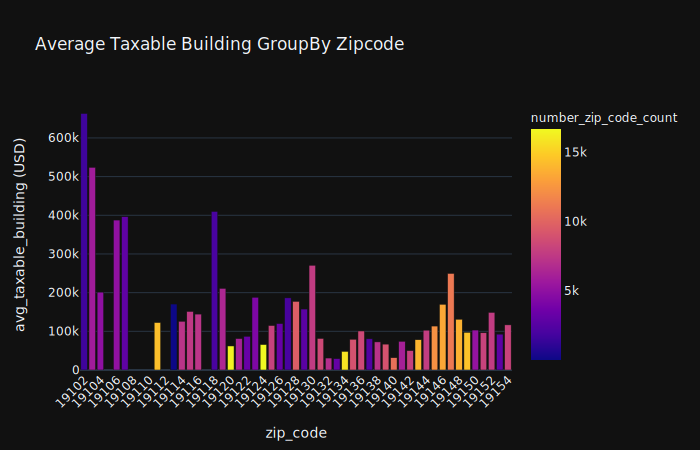

In [44]:
fig.write_image('../jupyter_nb/Vis_Figures/Avg_Taxable_Building_By_Zip_Code.jpg')
fig.show('svg')

In [48]:
# Average Sale Price (publica records) Group By Zip Zode 
fig = px.bar(zip_code_gb_phi_df, x = 'zip_code', y= 'avg_sale_price', color = 'number_zip_code_count', 
             template = 'plotly_dark', title = 'Average Sales Price (Public Records) GroupBy Zipcode')
fig.update_layout(xaxis_tickformat = ' ')
fig.update_layout(yaxis_title="avg_sales_price (USD)")
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(nticks=53)
fig.show()

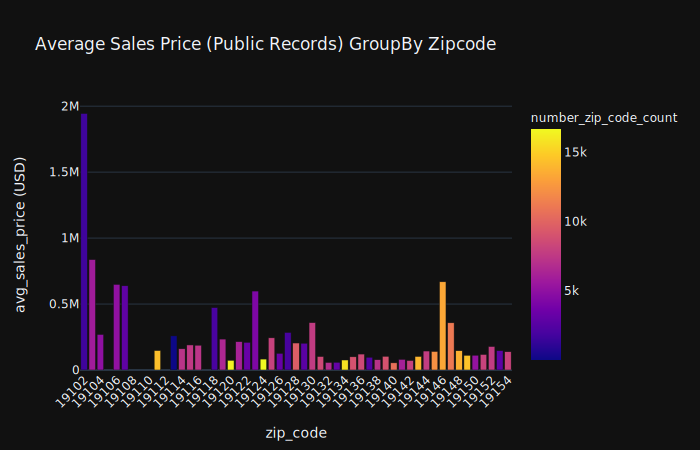

In [49]:
fig.write_image('../jupyter_nb/Vis_Figures/Avg_sales_Price_By_Zip_Code.jpg')
fig.show('svg')

In [52]:
# Average Market Sales Price 2017 - 2020 Group By Zip Zode 
fig = px.bar(zip_code_gb_phi_df, x = 'zip_code', y= 'avg_sales_price_2017_to_2020_market_sale', color = 'ave_sale_count_2017_to_2020_market_sale', 
             template = 'plotly_white', title = 'Average Sales Price (melissa real estate agent records) GroupBy Zipcode')
fig.update_layout(xaxis_tickformat = ' ')
fig.update_layout(yaxis_title="avg_sales_price_2017_to_2020 mkt (USD)")
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_xaxes(nticks=53)
fig.show()

In [60]:
fig = px.scatter_3d(zip_code_gb_phi_df, x = 'zip_code', y = 'avg_taxable_building', z='avg_year_built',  
                    color = 'avg_market_value', template = 'plotly_dark', 
title = 'avg_taxable_building - avg_year_built - avg_market_value')
fig.show()

In [10]:
fig = px.scatter_3d(zip_code_gb_phi_df, x='avg_livable_area', y = 'avg_taxable_building', z = 'avg_year_built', 
                   size='avg_sale_price', color='avg_market_value', hover_data=['zip_code'], 
                   template = 'plotly_dark')
fig.show()

In [11]:
zip_code_gb_phi_df

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [ ]:
zip_code_gb_phi_df

In [25]:
# After Data Visualization, the summary data will be saved into the mysql database
conn = create_engine("mysql+pymysql://" + os.environ.get("mysql_user") + ":" + os.environ.get("mysql_key") + "@localhost:3306/data_group_project")
df = pd.read_csv('../data/summary_data/zip_code_gb_phi_house_df_summary.csv', delimiter=',')
df.to_sql(name='zip_code_gb_phi_house_df_summary', con=conn, schema='data_group_project', if_exists='replace')